In [2]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path
from itertools import product

In [7]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-11-21__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

print(df_sorted)

shape: (6, 78)
┌───────────┬─────────────┬─────┬─────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ tau_forwards ┆ tau_reverse ┆ rtot_capt_f ┆ rtot_rest_f │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---          ┆ s           ┆ it          ┆ it          │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64          ┆ ---         ┆ ---         ┆ ---         │
│           ┆             ┆     ┆     ┆   ┆              ┆ f64         ┆ f64         ┆ f64         │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 14.674855    ┆ 18.995088   ┆ 0.100746    ┆ 0.101182    │
│ 2         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ null         ┆ null        ┆ 0.18806     ┆ 0.183577    │
│ 2         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ 13.204439    ┆ 19.559738   ┆ 0.103776    ┆ 0.100972    │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 15.90623     ┆ 17.693093   ┆ 0.0

In [8]:
# chromatin
Lmin        = df_sorted["Lmin"][0]
Lmax        = df_sorted["Lmax"][0]
bps         = df_sorted["bps"][0]
L = np.arange(Lmin, Lmax, bps)

# time
tmax        = df_sorted["tmax"][0]
dt          = df_sorted["dt"][0]
t           = np.arange(0, tmax, dt)

# probas
mu          = df_sorted["mu"][0]
theta       = df_sorted["theta"][0]
rtot_capt   = df_sorted["rtot_capt"][0]
rtot_rest   = df_sorted["rtot_rest"][0]

# values
s = np.unique(df_sorted["s"])
l = np.unique(df_sorted["l"])
lmbda = np.unique(df_sorted["lmbda"])

[9.]


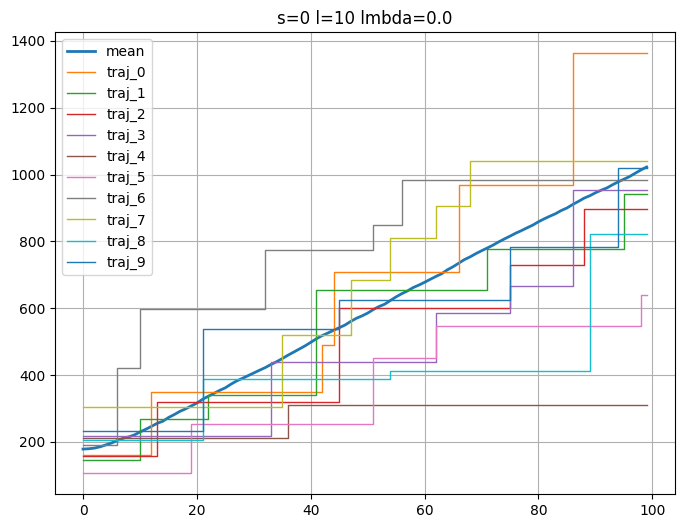

[4.5]


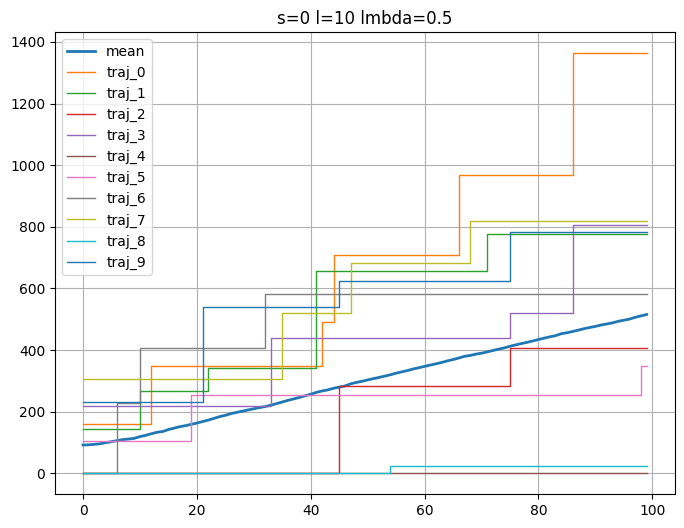

[0.]


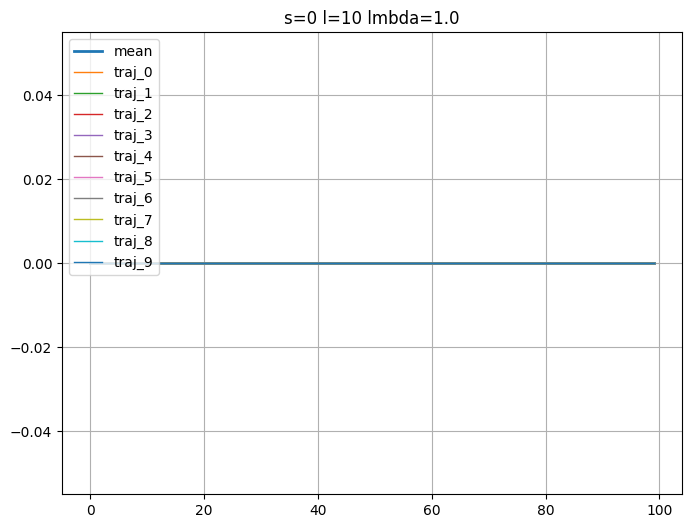

[2.]


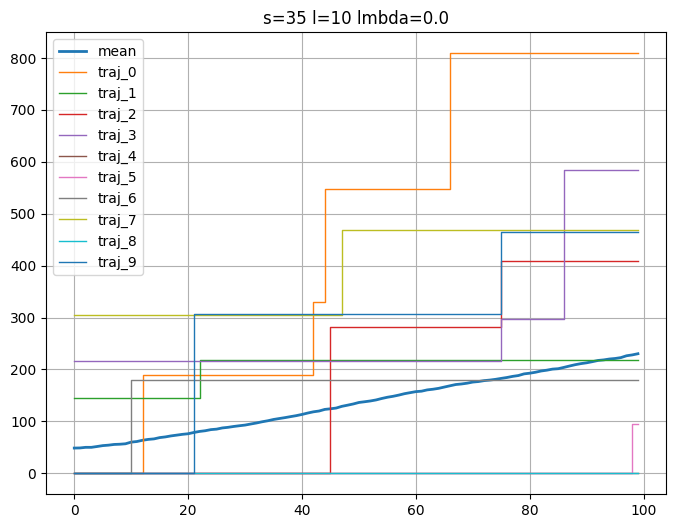

[1.]


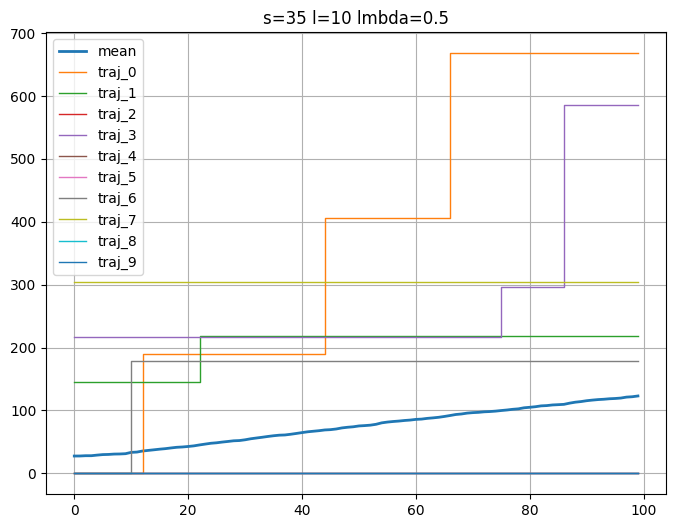

[0.]


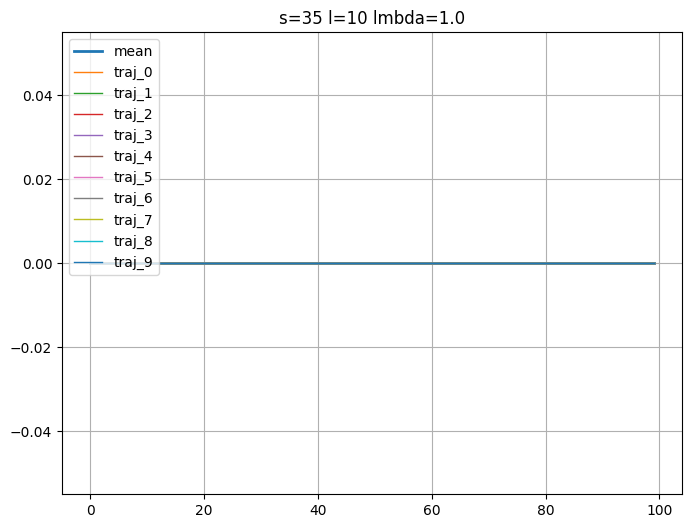

In [9]:
def get_data(df: pl.DataFrame, s: int, l: int, lmbda: float) -> pl.DataFrame:
    return df.filter(
        (pl.col("s") == s) &
        (pl.col("l") == l) &
        (pl.col("lmbda") == lmbda)
    )


for s_val, l_val, lmbda_val in product(s, l, lmbda):
    df = get_data(df=df_sorted, s=s_val, l=l_val, lmbda=lmbda_val)
    
    t_matrix        = df["t_matrix"][0]. to_numpy()
    x_matrix        = df["x_matrix"][0]. to_numpy()
    results         = df["results"][0]. to_numpy()
    results_mean    = df["results_mean"][0].to_numpy()
    v_th_sim        = df["v_th_sim"].to_numpy()
    print(v_th_sim)
    
    plt.figure(figsize=(8,6))
    plt.title(f"s={s_val} l={l_val} lmbda={lmbda_val}")
    plt.plot(results_mean, label=f"mean", lw=2)
    for i in range(0,10):
        # plt.step(t_matrix[i], x_matrix[i], lw= 0.6,
        #         label=f"traj_{i}", where="post")
        plt.step(t, results[i], lw= 1,
                label=f"traj_{i}", where="post")
    plt.grid(True)
    plt.legend()
    plt.show()

In [10]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-11-19__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

print(df_sorted)
print("\n", df_sorted["v_th_sim"].to_numpy() - df_sorted["v_th_fit"].to_numpy())
print("\n", df_sorted["v_th_sim"].to_numpy())
print("\n", df_sorted["lmbda"].to_numpy())

shape: (30, 78)
┌───────────┬─────────────┬─────┬─────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ tau_forwards ┆ tau_reverse ┆ rtot_bind_f ┆ rtot_rest_f │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---          ┆ s           ┆ it          ┆ it          │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64          ┆ ---         ┆ ---         ┆ ---         │
│           ┆             ┆     ┆     ┆   ┆              ┆ f64         ┆ f64         ┆ f64         │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.780083     ┆ 1.869238    ┆ 0.983217    ┆ 1.020223    │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.867147     ┆ 1.85533     ┆ 0.979239    ┆ 1.022268    │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.530629     ┆ 1.844921    ┆ 1.010077    ┆ 1.00082     │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.21363      ┆ 1.91258     ┆ 1.

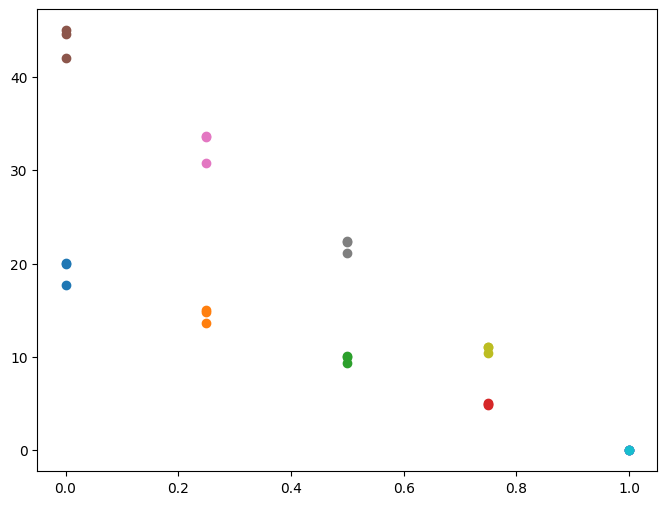

In [11]:
plt.figure(figsize=(8,6))

for row in df_sorted.iter_rows(named=True):
    x = row["lmbda"]
    y = row["v_mean"]
    # print("*")
    plt.scatter(x,y)
    
plt.show()

shape: (6, 78)
┌───────────┬─────────────┬─────┬─────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ tau_forwards ┆ tau_reverse ┆ rtot_capt_f ┆ rtot_rest_f │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---          ┆ s           ┆ it          ┆ it          │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64          ┆ ---         ┆ ---         ┆ ---         │
│           ┆             ┆     ┆     ┆   ┆              ┆ f64         ┆ f64         ┆ f64         │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 3.155515     ┆ 3.638588    ┆ 0.498113    ┆ 0.489237    │
│ 2         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ null         ┆ null        ┆ 0.662305    ┆ 0.65795     │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 2.614607     ┆ 3.589476    ┆ 0.502528    ┆ 0.492704    │
│ 2         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ 3.626638     ┆ 3.55724     ┆ 0.4

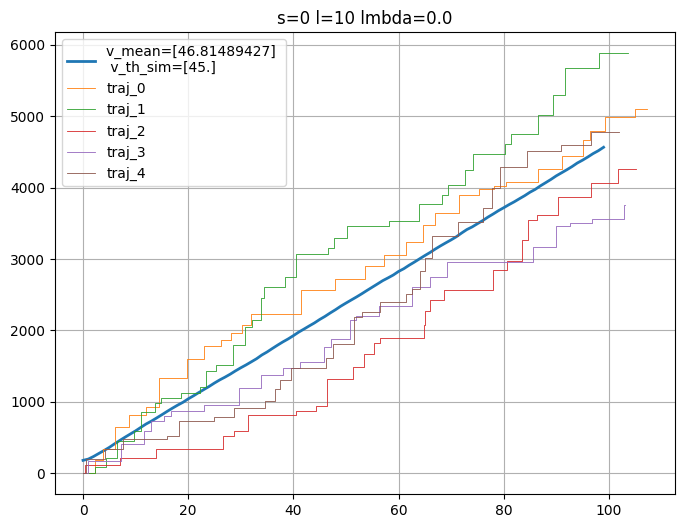

[22.5]


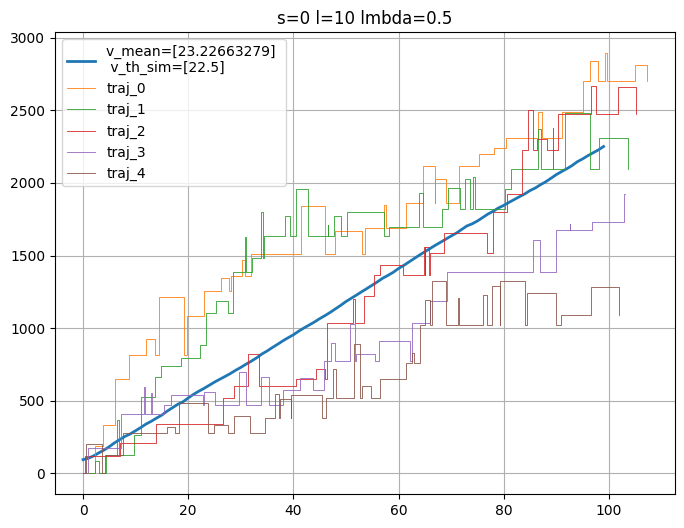

[0.]


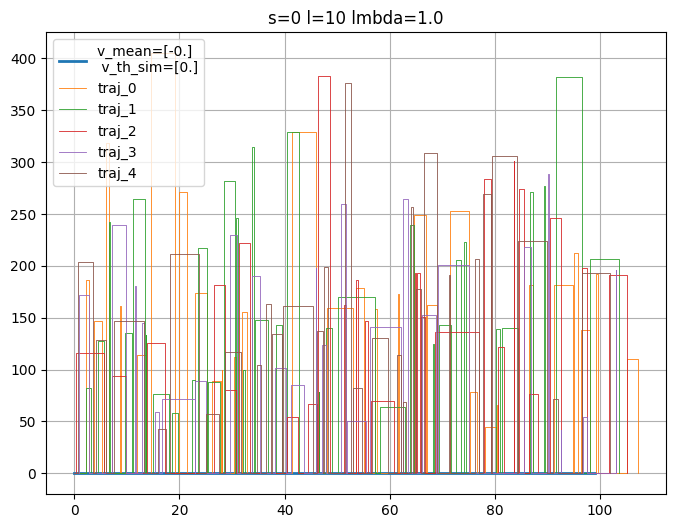

[10.]


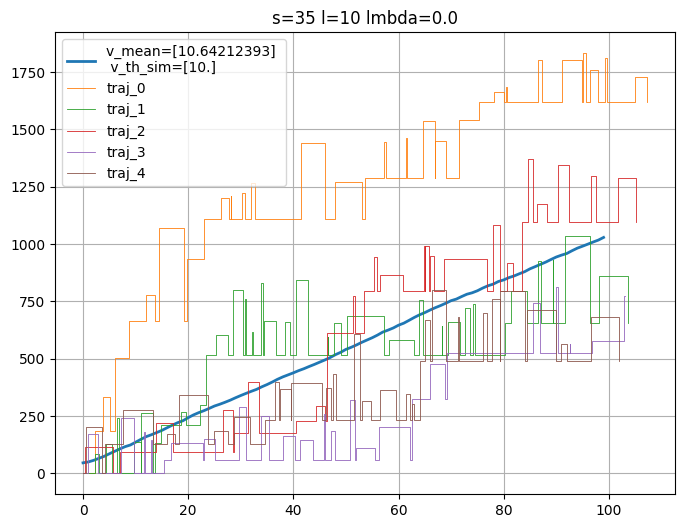

[5.]


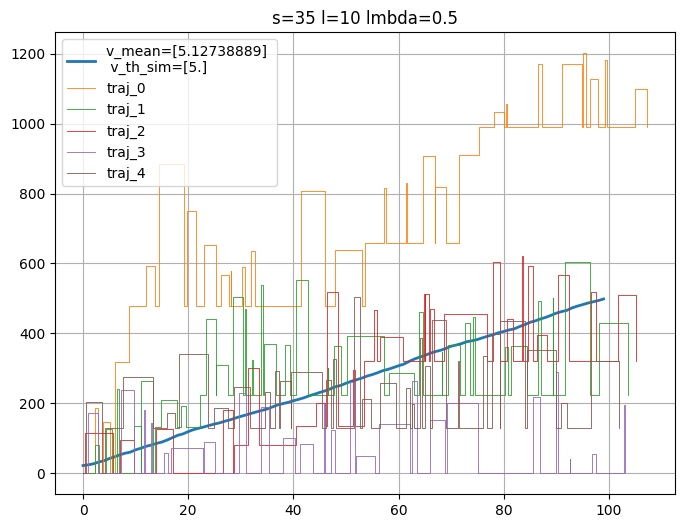

[0.]


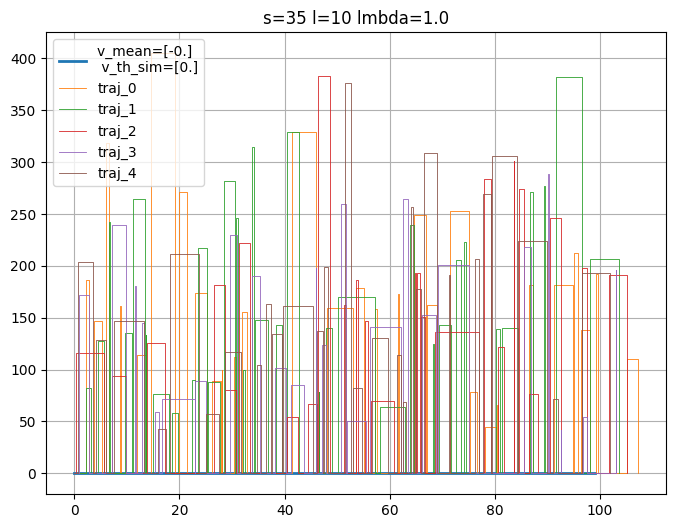

In [10]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-02__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

print(df_sorted)



# chromatin
Lmin        = df_sorted["Lmin"][0]
Lmax        = df_sorted["Lmax"][0]
bps         = df_sorted["bps"][0]
L = np.arange(Lmin, Lmax, bps)

# time
tmax        = df_sorted["tmax"][0]
dt          = df_sorted["dt"][0]
t           = np.arange(0, tmax, dt)

# probas
mu          = df_sorted["mu"][0]
theta       = df_sorted["theta"][0]
rtot_capt   = df_sorted["rtot_capt"][0]
rtot_rest   = df_sorted["rtot_rest"][0]

# values
s = np.unique(df_sorted["s"])
l = np.unique(df_sorted["l"])
lmbda = np.unique(df_sorted["lmbda"])



def get_data(df: pl.DataFrame, s: int, l: int, lmbda: float) -> pl.DataFrame:
    return df.filter(
        (pl.col("s") == s) &
        (pl.col("l") == l) &
        (pl.col("lmbda") == lmbda)
    )


for s_val, l_val, lmbda_val in product(s, l, lmbda):
    df = get_data(df=df_sorted, s=s_val, l=l_val, lmbda=lmbda_val)
    
    t_matrix        = df["t_matrix"][0]. to_numpy()
    x_matrix        = df["x_matrix"][0]. to_numpy()
    results         = df["results"][0]. to_numpy()
    results_mean    = df["results_mean"][0].to_numpy()
    v_th_sim        = df["v_th_sim"].to_numpy()
    v_mean          = df["v_mean"].to_numpy()
    print(v_th_sim)
    
    plt.figure(figsize=(8,6))
    plt.title(f"s={s_val} l={l_val} lmbda={lmbda_val}")
    plt.plot(results_mean, label=f"v_mean={v_mean} \n v_th_sim={v_th_sim}", lw=2)
    for i in range(0,5):
        plt.step(t_matrix[i], x_matrix[i], lw= 0.6,
                label=f"traj_{i}", where="post")
        # plt.step(t, results[i], lw= 1,
        #         label=f"traj_{i}", where="post")
    plt.grid(True)
    plt.legend()
    plt.show()

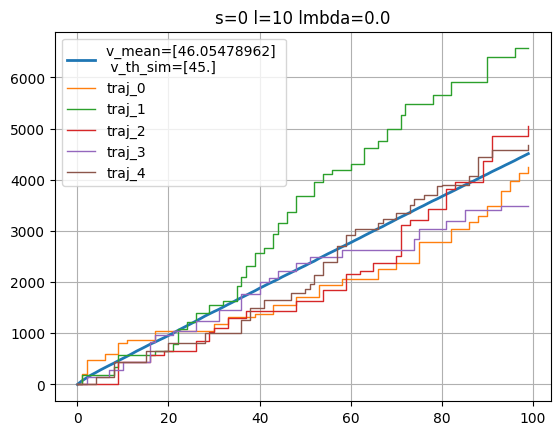

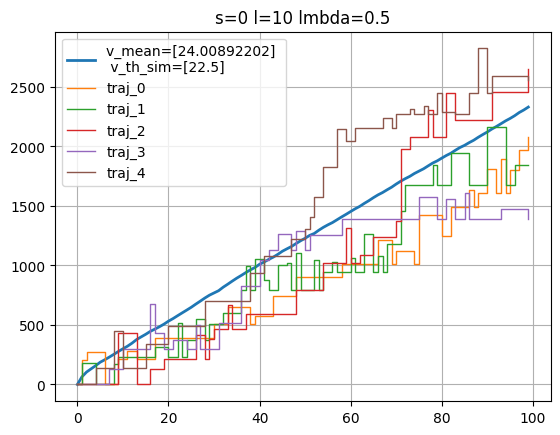

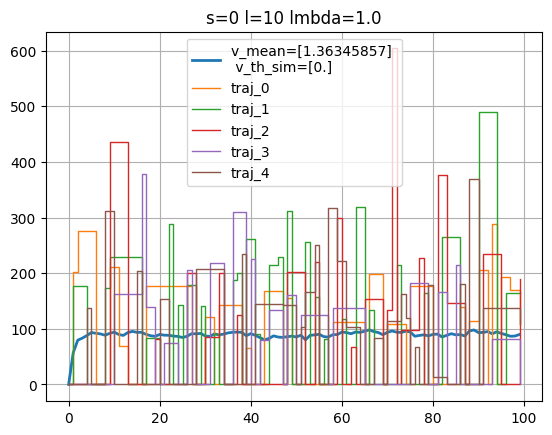

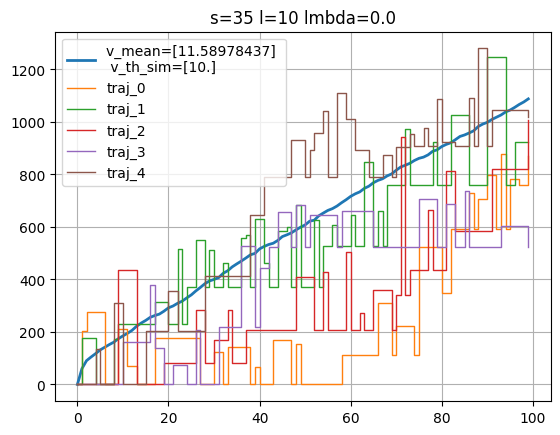

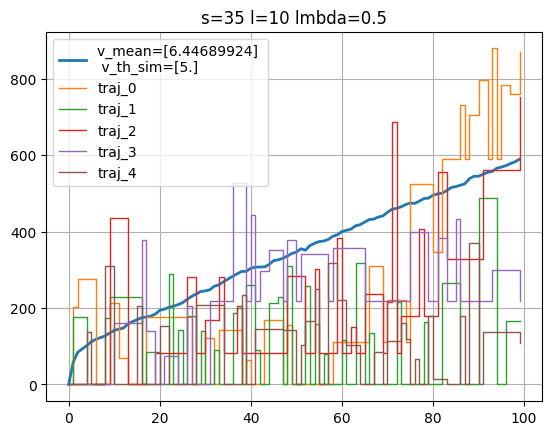

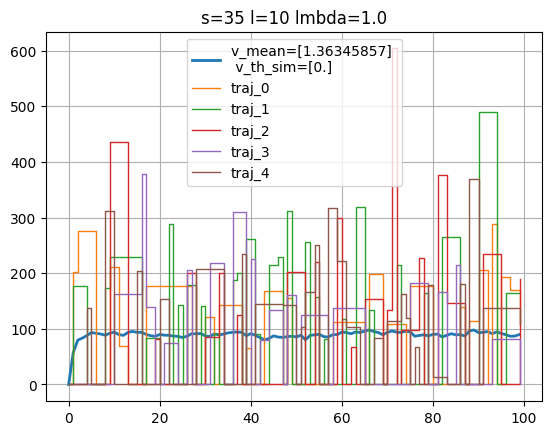

In [88]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-03__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

# print(df_sorted)



# chromatin
Lmin        = df_sorted["Lmin"][0]
Lmax        = df_sorted["Lmax"][0]
bps         = df_sorted["bps"][0]
L = np.arange(Lmin, Lmax, bps)

# time
tmax        = df_sorted["tmax"][0]
dt          = df_sorted["dt"][0]
t           = np.arange(0, tmax, dt)

# probas
mu          = df_sorted["mu"][0]
theta       = df_sorted["theta"][0]
rtot_capt   = df_sorted["rtot_capt"][0]
rtot_rest   = df_sorted["rtot_rest"][0]

# values
s = np.unique(df_sorted["s"])
l = np.unique(df_sorted["l"])
lmbda = np.unique(df_sorted["lmbda"])



def get_data(df: pl.DataFrame, s: int, l: int, lmbda: float) -> pl.DataFrame:
    return df.filter(
        (pl.col("s") == s) &
        (pl.col("l") == l) &
        (pl.col("lmbda") == lmbda)
    )


for s_val, l_val, lmbda_val in product(s, l, lmbda):
    df = get_data(df=df_sorted, s=s_val, l=l_val, lmbda=lmbda_val)
    
    t_matrix        = df["t_matrix"][0]. to_numpy()
    x_matrix        = df["x_matrix"][0]. to_numpy()
    results         = df["results"][0]. to_numpy()
    results_mean    = df["results_mean"][0].to_numpy()
    v_th_sim        = df["v_th_sim"].to_numpy()
    v_mean          = df["v_mean"].to_numpy()
    # print(v_th_sim)
    # print(results[0])
    # print(x_matrix[0])
    # print(t_matrix[0])
    
    # plt.figure(figsize=(8,6))
    plt.title(f"s={s_val} l={l_val} lmbda={lmbda_val}")
    plt.plot(results_mean, label=f"v_mean={v_mean} \n v_th_sim={v_th_sim}", lw=2)
    for i in range(0,5):
        # plt.step(t_matrix[i], x_matrix[i], lw= 0.6,
        #         label=f"traj_{i}", where="post")
        plt.step(t, results[i], lw= 1,
                label=f"traj_{i}", where="post")
    plt.grid(True)
    plt.legend()
    plt.show()
    


In [67]:
# print(x_matrix)
# print(t_matrix)

nT = 2

x_list = x_matrix[0]
t_list = t_matrix[0]
# print(x_list, "\n", t_list)

results = np.empty((nT, int(tmax / dt)))
results.fill(np.nan)
r_list = results[0]
# print(r_list)

# t_list_diff = np.diff(t_list)
# print(t_list_diff)

# Conversion
x = x_list[~np.isnan(x_list)]
t = t_list[~np.isnan(t_list)]
print(t)
print(x)

i0 = 0
for i in range(len(t)-2):
    index = int(t[i] / dt)
    value = int(x[i])
    r_list[index] = value
    # r_list[i0:index] = value ; i0 = index

print(r_list)    
    

[  0.           0.56233232   4.57329117   4.69849393   4.9277151
   6.24189603   7.8364662    9.13168756  10.32625359  11.58846976
  12.06703519  14.25245073  14.37204871  16.13650585  20.95267898
  26.32005876  29.04297606  37.9555837   41.74080865  42.5634747
  42.88858159  45.07809901  45.76729011  46.28514462  48.99515328
  49.49458497  51.50225729  52.50358393  53.59590823  53.80502364
  56.61989248  59.64580017  68.01215999  68.27064059  71.72823923
  74.84261426  77.0549528   78.69504141  80.00774218  87.28111909
  87.94604809  92.15519679  94.08475307 102.14058078 109.18749271]
[  0. 103.   0. 283.   0.  44.   0. 279.   0. 212.   0. 198.   0. 270.
   0. 127.   0.  87.   0. 270.   0. 449.   0.  48.   0. 251.   0. 329.
   0. 293.   0. 249.   0. 109.   0.  73.   0.  53.   0. 104.   0. 294.
   0. 152.   0.]
[103.  nan  nan  nan   0.  nan  44.   0.  nan 279.   0. 212.   0.  nan
   0.  nan 270.  nan  nan  nan   0.  nan  nan  nan  nan  nan 127.  nan
  nan   0.  nan  nan  nan  nan  nan

In [65]:
a = np.array([1, np.nan, 4, np.nan])
# a_diff = 
print(a[~np.isnan(a)])

[1. 4.]


In [ ]:
print()

# .